In [95]:
import matplotlib.pyplot as plt
import pandas as pd


# import data from xlsx file
df = pd.read_excel('Consommation.xlsx')
df['Consommation'] = df['Consommation'].str.lower()
df

,Consommation
0,"1,2/semaine"
1,"1,2/semaine"
2,2/semaine
3,"2,3/semaine"
4,"3,4/semaine"
...,...
599,2/mois
600,1/semaine
601,"1,2/mois"
602,1/mois


In [96]:
df['Consommation'] = df['Consommation'].str.strip()

In [97]:
# count the number of rows that end with 'e'
df['Consommation'].str.endswith('e').sum()+df['Consommation'].str.endswith('s').sum()

593

In [98]:
# select all rows that do not end with 'e' or 's'
df[df['Consommation'].str.endswith('e') == False][df['Consommation'].str.endswith('s') == False]

C:\Users\moham\AppData\Local\Temp\ipykernel_1904\3100202804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Consommation'].str.endswith('e') == False][df['Consommation'].str.endswith('s') == False]


,Consommation
93,je ne sais pas exactement
234,pas beaucoup
239,rarement
241,très rarement
247,pas trop
372,frequemment
379,frequemment
397,frequemment
421,1fois/mois au maximum
487,regulierement


In [99]:
# changer la valeur 'frequemment' en '3/mois'
df['Consommation'] = df['Consommation'].str.replace('regulierement', '5/mois')
df['Consommation'] = df['Consommation'].str.replace('1fois/mois au maximum', '1/mois')
df['Consommation'] = df['Consommation'].str.replace('très rarement', '1/mois')
df['Consommation'] = df['Consommation'].str.replace('rarement', '2/mois')
df['Consommation'] = df['Consommation'].str.replace('frequemment', '3/mois')
df[df['Consommation'].str.endswith('e') == False][df['Consommation'].str.endswith('s') == False]

C:\Users\moham\AppData\Local\Temp\ipykernel_1904\3499516771.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Consommation'].str.endswith('e') == False][df['Consommation'].str.endswith('s') == False]


,Consommation
93,je ne sais pas exactement
234,pas beaucoup
247,pas trop
530,plusieurs fois (repas/salade)


Normalisons sous la forme 'X fois par mois'

In [100]:
df1 = df[df['Consommation'].str.endswith('e') == True]
df2 = df[df['Consommation'].str.endswith('s') == True]

In [101]:
df1

,Consommation
0,"1,2/semaine"
1,"1,2/semaine"
2,2/semaine
3,"2,3/semaine"
4,"3,4/semaine"
...,...
584,"1,2/semaine"
585,"1,2/semaine"
588,1/semaine
589,1/semaine


In [102]:
df2

,Consommation
45,3 fois / mois
46,5 fois / mois
50,3 fois / mois
52,3 fois / mois
59,5 fois / mois
...,...
598,"1,2/mois"
599,2/mois
601,"1,2/mois"
602,1/mois


In [103]:
# transform all values of df2 to the first caracter in the string
df2['Consommation'] = df2['Consommation'].str[0]
# convert to int
df2['Consommation'] = df2['Consommation'].astype(int)
df2

C:\Users\moham\AppData\Local\Temp\ipykernel_1904\1192983812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Consommation'] = df2['Consommation'].str[0]
C:\Users\moham\AppData\Local\Temp\ipykernel_1904\1192983812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Consommation'] = df2['Consommation'].astype(int)


,Consommation
45,3
46,5
50,3
52,3
59,5
...,...
598,1
599,2
601,1
602,1


In [104]:
# transform all values of df1 to the first caracter in the string
df1['Consommation'] = df1['Consommation'].str[0]
# convert to int
df1['Consommation'] = df1['Consommation'].astype(int)
df1

C:\Users\moham\AppData\Local\Temp\ipykernel_1904\2772283418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Consommation'] = df1['Consommation'].str[0]
C:\Users\moham\AppData\Local\Temp\ipykernel_1904\2772283418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Consommation'] = df1['Consommation'].astype(int)


,Consommation
0,1
1,1
2,2
3,2
4,3
...,...
584,1
585,1
588,1
589,1


1 mois = 4 semaine

In [105]:
# multiply the values of df2 by 4
df1['Consommation'] = df1['Consommation']*4
df1

C:\Users\moham\AppData\Local\Temp\ipykernel_1904\840436912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Consommation'] = df1['Consommation']*4


,Consommation
0,4
1,4
2,8
3,8
4,12
...,...
584,4
585,4
588,4
589,4


In [106]:
# concat df1 and df2
df = pd.concat([df1, df2])
df

,Consommation
0,4
1,4
2,8
3,8
4,12
...,...
598,1
599,2
601,1
602,1


Maintenant, nous avons une base de données qui contient des valeurs normalisées sous X fois par mois

In [107]:
# changer le titre de la colonne
df = df.rename(columns={'Consommation': 'Consommation par mois'})
df

,Consommation par mois
0,4
1,4
2,8
3,8
4,12
...,...
598,1
599,2
601,1
602,1


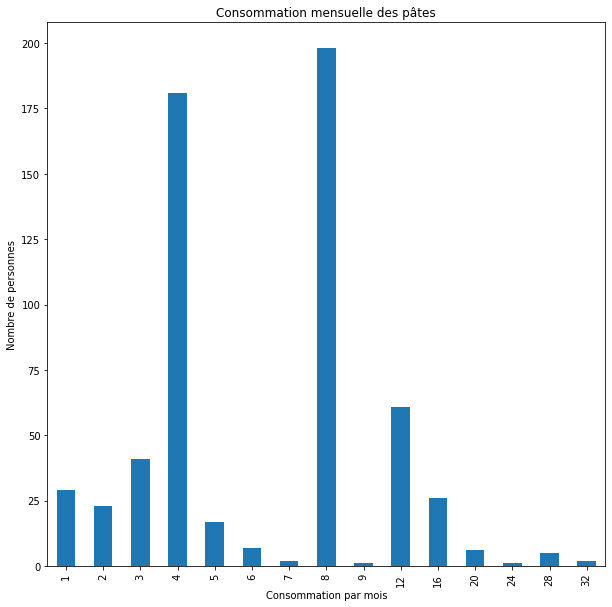

In [134]:
# plot the data
plt.figure(figsize=(10,10))
df_sorted= df.sort_values(by='Consommation par mois')
sorted_values = df_sorted['Consommation par mois'].unique()
ax=df_sorted['Consommation par mois'].value_counts().loc[sorted_values].plot(kind='bar')
plt.xlabel('Consommation par mois')
plt.ylabel('Nombre de personnes')
plt.title('Consommation mensuelle des pâtes')

plt.show()


In [119]:
df.describe()

,Consommation par mois
count,600.000000
mean,6.920000
std,4.580236
min,1.000000
25%,4.000000
50%,7.500000
75%,8.000000
max,32.000000
